# HEATMAPS

In [2]:
import pandas as pd
import numpy as np
import helper as hp
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
df_prod = pd.read_pickle("../data/df_prod.pkl")

In [4]:
df_value = pd.read_pickle("../data/df_value.pkl")

In [5]:
df_trade = pd.read_pickle("../data/df_trade.pkl")

In [6]:
df_valpt = pd.read_pickle("../data/df_valpt.pkl")

In [7]:
df_imp = pd.read_pickle("../data/df_imp.pkl")

In [8]:
df_exp = pd.read_pickle("../data/df_exp.pkl")

## Add in **COUNTRIES** the countries you want to consider and in **ITEMS** the items you want to consider

In [8]:
# df_prod['Area'].unique() #--> In case you want to check the available countries

In [9]:
df_prod['Item'].unique() #--> In case you want to check the available items

array(['Almonds, with shell', 'Anise, badian, fennel, coriander',
       'Apples', 'Apricots', 'Barley', 'Cotton lint', 'Cottonseed',
       'Figs', 'Fruit, fresh nes', 'Grapes', 'Linseed', 'Maize',
       'Melons, other (inc.cantaloupes)', 'Millet', 'Olives',
       'Onions, dry', 'Oranges', 'Peaches and nectarines', 'Pears',
       'Pistachios', 'Plums and sloes', 'Potatoes', 'Sesame seed',
       'Sugar beet', 'Sunflower seed', 'Vegetables, fresh nes',
       'Walnuts, with shell', 'Watermelons', 'Wheat', 'Beans, dry',
       'Beans, green', 'Broad beans, horse beans, dry',
       'Cabbages and other brassicas', 'Carrots and turnips',
       'Cauliflowers and broccoli', 'Cherries', 'Cherries, sour',
       'Chestnut', 'Chillies and peppers, green',
       'Cucumbers and gherkins', 'Dates', 'Eggplants (aubergines)',
       'Garlic', 'Hops', 'Leeks, other alliaceous vegetables',
       'Lemons and limes', 'Lettuce and chicory',
       'Mushrooms and truffles', 'Oats', 'Onions, shallot

In [10]:
# Countries selected
countries = [
       'Austria', 'Argentina', 
       'Belgium', 'Brazil', 'Bahamas', 'Canada',
       'China, Hong Kong SAR', 'China, Taiwan Province of', 'China, mainland',  'Croatia','Cuba', 'Czechia',
       'Denmark', 'Dominica', 'Ecuador','Estonia',
       'Finland','France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India','Ireland', 'Italy', 'Iran (Islamic Republic of)','Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Morocco', 'Netherlands', 'Norway', 'Poland','Portugal','Republic of Moldova','Pakistan', 
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland','Turkey', 'Ukraine', 'United Arab Emirates','United Kingdom', 
       'United States of America']

In [11]:
# Items selected
items = ['Almonds, with shell', 'Anise, badian, fennel, coriander',
       'Apples', 'Apricots', 'Barley', 'Grapes', 'Linseed', 'Maize',
       'Melons, other (inc.cantaloupes)', 'Millet', 'Olives',
       'Onions, dry', 'Oranges', 'Peaches and nectarines', 'Pears',
       'Pistachios', 'Plums and sloes', 'Potatoes', 'Sesame seed',
       'Sugar beet', 'Sunflower seed', 'Vegetables, fresh nes',
       'Walnuts, with shell', 'Watermelons', 'Wheat', 'Beans, dry',
       'Beans, green', 'Broad beans, horse beans, dry',
       'Cabbages and other brassicas', 'Carrots and turnips',
       'Cauliflowers and broccoli', 'Cherries', 'Cherries, sour',
       'Chestnut', 'Chillies and peppers, green',
       'Cucumbers and gherkins', 'Dates', 'Eggplants (aubergines)',
       'Garlic', 'Hops', 'Leeks, other alliaceous vegetables',
       'Lemons and limes', 'Lettuce and chicory',
       'Mushrooms and truffles', 'Oats', 'Onions, shallots, green',
       'Peas, green', 'Pumpkins, squash and gourds', 'Quinces', 'Rye',
       'Sorghum', 'Soybeans', 'Spinach',
       'Tangerines, mandarins, clementines, satsumas',
       'Tobacco, unmanufactured', 'Tomatoes', 'Vetches', 'Artichokes',
       'Bananas', 'Chick peas', 'Chillies and peppers, dry',
       'Fruit, tropical fresh nes', 'Grapefruit (inc. pomelos)',
       'Lentils', 'Peas, dry', 'Rapeseed', 'Strawberries', 'Cassava',
       'Cocoa, beans', 'Coconuts', 'Maize, green', 'Pineapples',
       'Cashew nuts, with shell', 'Coffee, green', 'Oil, palm',
       'Sweet potatoes', 'Mangoes, mangosteens, guavas', 'Asparagus',
       'Avocados', 'Canary seed', 'Fibre crops nes', 'Flax fibre and tow',
       'Maté', 'Oilseeds nes', 'Papayas', 'Tea', 'Hazelnuts, with shell',
       'Blueberries', 'Currants', 'Kiwi fruit', 'Mustard seed',
       'Persimmons', 'Triticale', 'Gooseberries', 'Grain, mixed',
       'Poppy seed', 'Cranberries', 'Plantains and others', 'Areca nuts',
       'Ginger', 'Jute', 'Rubber, natural', 'Buckwheat', 'Fonio',
       'Karite nuts (sheanuts)', 'Kola nuts', 'Pepper (piper spp.)',
       'Nutmeg, mace and cardamoms', 'Pyrethrum, dried', 'Quinoa',
       'Cashewapple', 'Bambara beans', 'Cloves', 'Vanilla',
       'Manila fibre (abaca)', 'Kapokseed in shell']

In [12]:
# Selecting the indicated countries
df_countries = pd.DataFrame(countries)
df_countries.columns = ['Reporter Countries']
df_imp = df_imp.merge(df_countries, on = 'Reporter Countries', how='inner')
df_exp = df_exp.merge(df_countries, on = 'Reporter Countries', how='inner')
df_prod = df_prod.merge(df_countries, left_on = 'Area', right_on = 'Reporter Countries', how='inner')

In [13]:
# Selecting the indicating products
df_items = pd.DataFrame(items)
df_items.columns = ['Item']
df_imp = df_imp.merge(df_items, on = 'Item', how='inner')
df_exp = df_exp.merge(df_items, on = 'Item', how='inner')
df_prod = df_prod.merge(df_items, on = 'Item', how='inner')

## A. Focusing on countries (all for year 2016)

* A.1. Similarity considering the **products** they **produce**
* A.2. Similarity considering the **countries** they **export**
* A.3. Similarity considering the **countries** they **import**
* A.4. Similarity considering the **import-export** **countries** in common
* A.5. Similarity considering the **products** they **export**
* A.6. Similarity considering the **products** they **import**
* A.7. Similarity considering the **import-export** **products** --> The most interesting in my opinion

From the matrixes A.7., we could analyze that if the jaccard similarity for the same country is really high, it would mean that they are importing the same as they export. We could also look to the countries that import the same products as other country exports, so we can find trade relations amongst countries. If we find the interesting relations we could take a look to which kind of products these are. Also, in A.3., we could look to countries that import to the same countries as other countries export, so we can also find some paths.

If we look to the similarity considering the products produced, we could analyze also if countries with high similarity have similar *climate/weather* conditions to produce the same products. All this matrixes can be related to what they import/export to but not clear how yet hehe.

#### To include:
* Should we normalize and establish a treshold? (We may be considering countries/products where the production/import/export is minimum)

### A.1. Similarity amogst countries considering the products produced

In [14]:
df_prod.head(2)

,Area,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Reporter Countries
0,Argentina,"Almonds, with shell",Area harvested,ha,235.0,236.0,239.0,241.0,241.0,241.0,...,283.0,300.0,300.0,300.0,400.0,384.0,346.0,356.0,365.0,Argentina
1,Argentina,"Almonds, with shell",Yield,hg/ha,19169.0,19150.0,19131.0,19112.0,19199.0,19348.0,...,19003.0,19217.0,20667.0,20667.0,16250.0,17412.0,19014.0,19111.0,19121.0,Argentina


In [15]:
# Delete this items with 0 value of production
df_prod_simil = df_prod.loc[df_prod['Y2016'] != 0][['Area','Item','Y2016']].copy()
# We group by area, and list the items for each area
df_prod_simil = df_prod_simil.groupby('Area')['Item'].apply(list).reset_index(name='Collection Items')

In [16]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

In [17]:
# Compute Jaccard similarity
n = len(df_prod_simil)
matrix_similarity_products = np.empty((n,n))
for i in range(n):
    for j in range(n):
        list1 = df_prod_simil['Collection Items'].iloc[i]
        list2 = df_prod_simil['Collection Items'].iloc[j]
        matrix_similarity_products[i][j] = jaccard_similarity(list1, list2)

Text(0.5, 1, 'Products produced similarity')

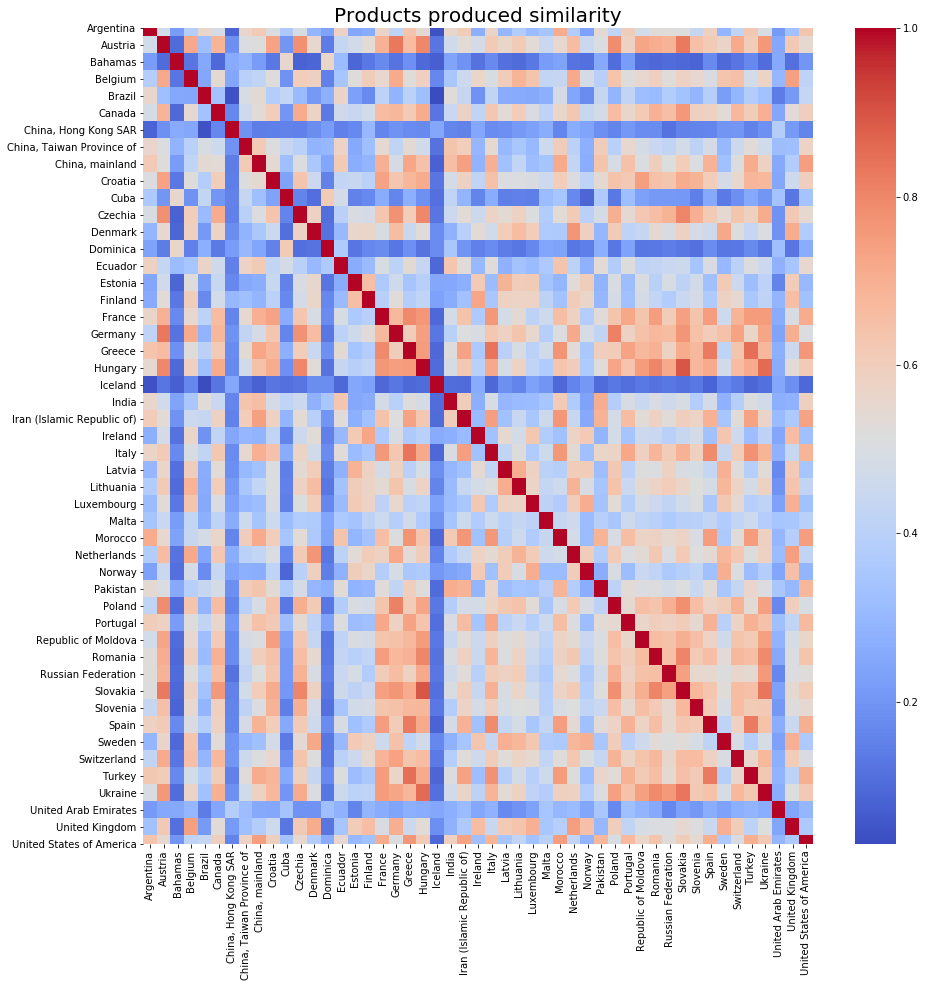

In [18]:
labels = df_prod_simil['Area']
plt.figure(figsize = (15,15))
sns.heatmap(matrix_similarity_products[:50, :50], xticklabels = labels[:50], yticklabels = labels[:50],  cmap='coolwarm')
plt.title('Products produced similarity', fontsize = 20)

### A.2. Similarity amogst countries considering the countries they export to

In [19]:
# Delete this items with 0 value of production
df_exp_simil = df_exp.loc[df_exp['Y2016'] != 0][['Reporter Countries','Partner Countries','Y2016']].copy()
df_exp_simil = df_exp_simil.groupby('Reporter Countries')['Partner Countries'].apply(list).reset_index(name='Partner Countries')

In [20]:
# Compute Jaccard similarity
n = len(df_exp_simil)
matrix_similarity_partner_exp = np.empty((n,n))
for i in range(n):
    for j in range(n):
        list1 = df_exp_simil['Partner Countries'].iloc[i]
        list2 = df_exp_simil['Partner Countries'].iloc[j]
        matrix_similarity_partner_exp[i][j] = jaccard_similarity(list1, list2)

Text(0.5, 1, 'Countries they export to')

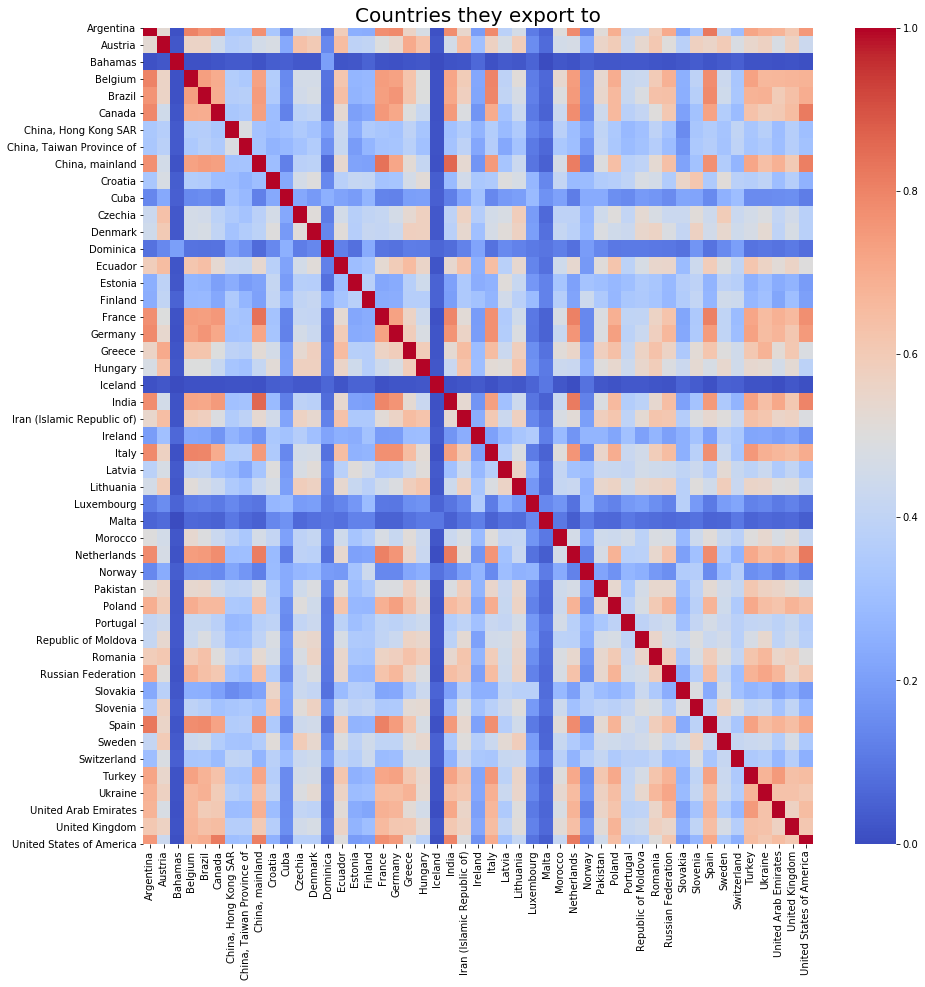

In [21]:
plt.figure(figsize = (15,15))
labels = df_exp_simil['Reporter Countries']
sns.heatmap(matrix_similarity_partner_exp[:50, :50], xticklabels = labels[:50], yticklabels = labels[:50],  cmap='coolwarm')
plt.title('Countries they export to', fontsize = 20)

### A.3. Similarity amongst countries where they import

In [22]:
df_imp.head(2)

,Reporter Countries,Partner Countries,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
0,Argentina,Albania,"Anise, badian, fennel, coriander",Import value/quantity,1000 US$/tonne,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.0,0.0,0.0,3.0,3.25,7.00,2.5,3.000,0.0
1,Argentina,Argentina,"Anise, badian, fennel, coriander",Import value/quantity,1000 US$/tonne,0.0,0.0,0.0,0.0,0.0,...,0.428571,0.0,0.0,0.0,0.0,0.00,0.65,0.0,1.125,0.0


In [23]:
# Delete this items with 0 value of production
df_imp_simil = df_imp.loc[df_imp['Y2016'] != 0][['Reporter Countries','Partner Countries','Y2016']].copy()
df_imp_simil = df_imp_simil.groupby('Reporter Countries')['Partner Countries'].apply(list).reset_index(name='Partner Countries')

In [24]:
# Compute Jaccard similarity
n1 = len(df_imp_simil)
n2 = len(df_imp_simil)
matrix_similarity_partner_imp = np.empty((n1,n2))
for i in range(n1):
    for j in range(n2):
        list1 = df_imp_simil['Partner Countries'].iloc[i]
        list2 = df_imp_simil['Partner Countries'].iloc[j]
        matrix_similarity_partner_imp[i][j] = jaccard_similarity(list1, list2)

Text(0.5, 1, 'Countries they import from')

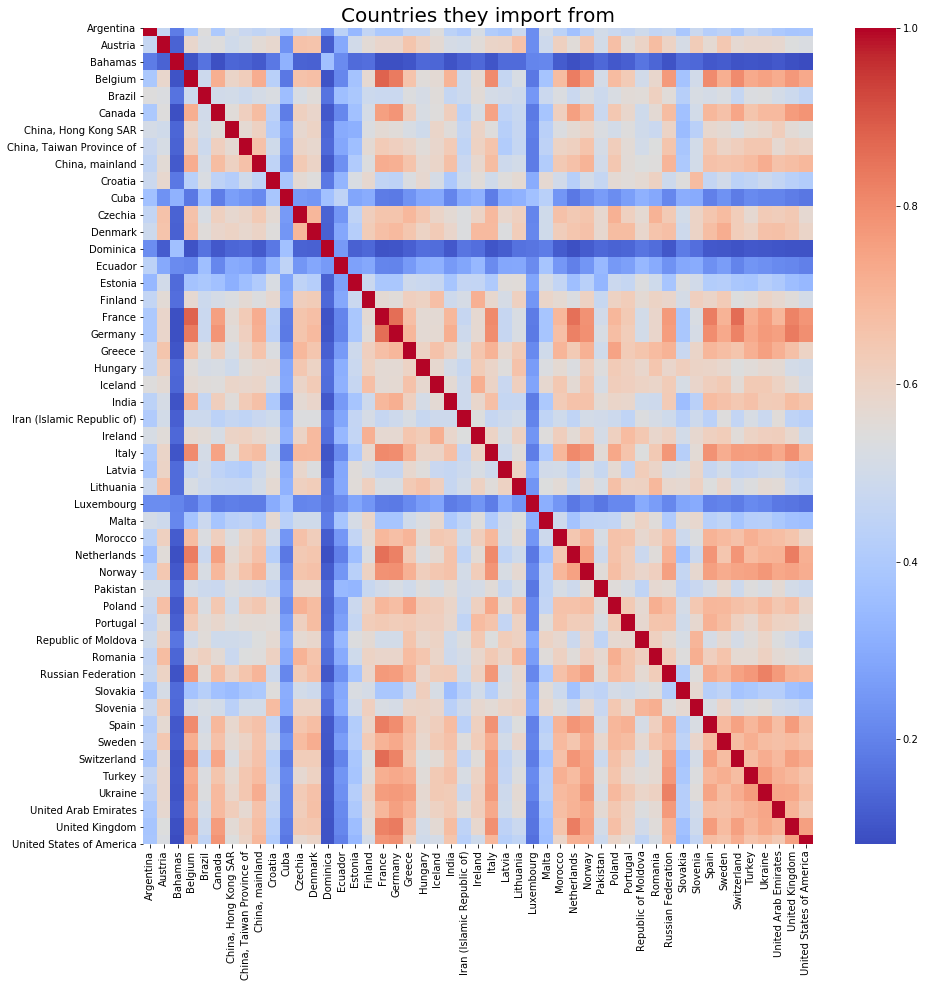

In [25]:
labels = df_imp_simil['Reporter Countries']
plt.figure(figsize = (15,15))
sns.heatmap(matrix_similarity_partner_imp[:50,:50], xticklabels = labels[:50], yticklabels = labels[:50], cmap='coolwarm')
plt.title('Countries they import from', fontsize = 20)

### A.4. Similarity amongst countries where they import-export and viceversa.

In [26]:
# Compute Jaccard similarity
n1 = len(df_exp_simil)
n2 = len(df_imp_simil)
matrix_similarity_partner_impexp = np.empty((n1,n2))
for i in range(n1):
    for j in range(n2):
        list1 = df_exp_simil['Partner Countries'].iloc[i]
        list2 = df_imp_simil['Partner Countries'].iloc[j]
        matrix_similarity_partner_impexp[i][j] = jaccard_similarity(list1, list2)

Text(0.5, 1, 'Countries import-export and viceversa')

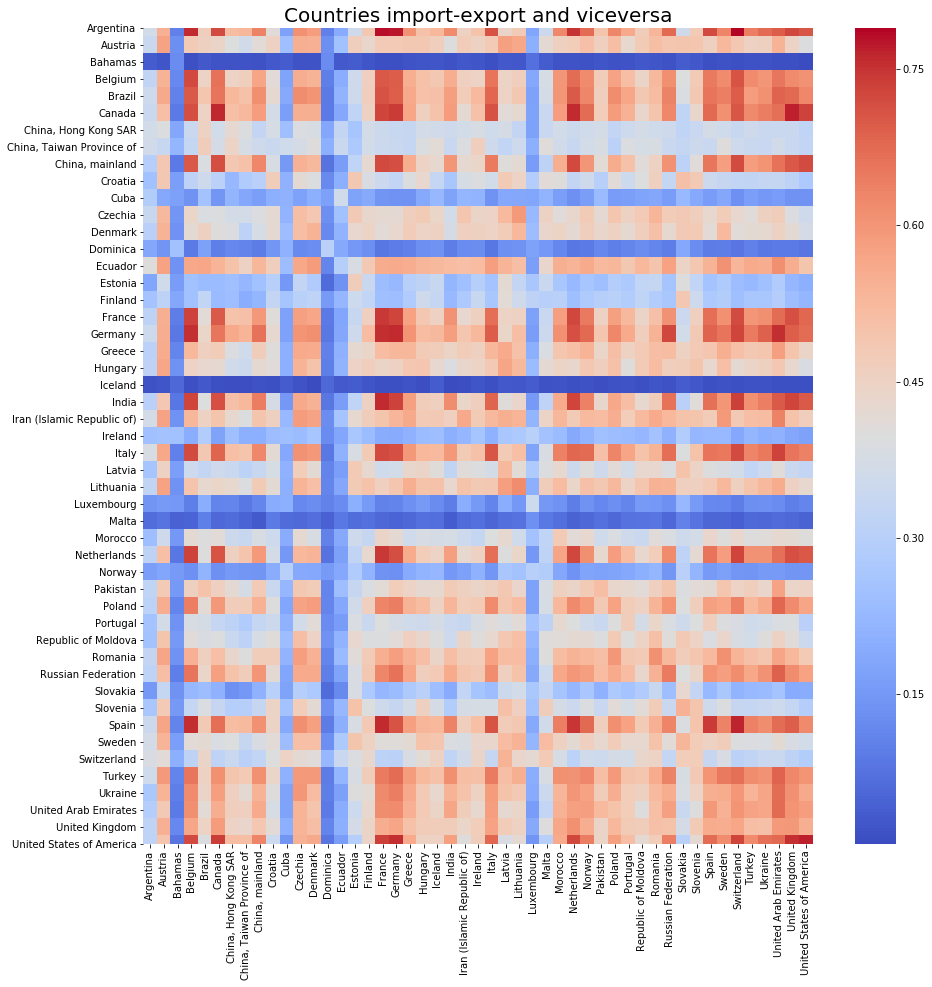

In [27]:
xlabels = df_exp_simil['Reporter Countries']
ylabels = df_imp_simil['Reporter Countries']
plt.figure(figsize = (15,15))
sns.heatmap(matrix_similarity_partner_impexp[:50,:50], xticklabels = xlabels[:50], yticklabels = ylabels[:50], cmap='coolwarm')
plt.title('Countries import-export and viceversa', fontsize = 20)

Belgium is importing to a lot of countries from which Argentina is exporting --> maybe it is interesting to analyze which kind of products. Could this be done directly from one to the other?

### A.5. Similarity considering the products they export

In [28]:
# Delete this items with 0 value of production
df_exp_simil_prod = df_exp.loc[df_imp['Y2016'] != 0][['Reporter Countries','Item','Y2016']].copy()
df_exp_simil_prod = df_exp_simil_prod.groupby('Reporter Countries')['Item'].apply(list).reset_index(name='Products Exported')
df_exp_simil_prod.head(2)

,Reporter Countries,Products Exported
0,Argentina,"[Maize, Maize, Maize, Maize, Maize, Maize, Mai..."
1,Austria,"[Maize, Maize, Maize, Maize, Maize, Maize, Mai..."


In [29]:
# Compute Jaccard similarity
n = len(df_exp_simil_prod)
matrix_similarity_product_exp = np.empty((n,n))
for i in range(n):
    for j in range(n):
        list1 = df_exp_simil_prod['Products Exported'].iloc[i]
        list2 = df_exp_simil_prod['Products Exported'].iloc[j]
        matrix_similarity_product_exp[i][j] = jaccard_similarity(list1, list2)

Text(0.5, 1, 'Products exported similarity')

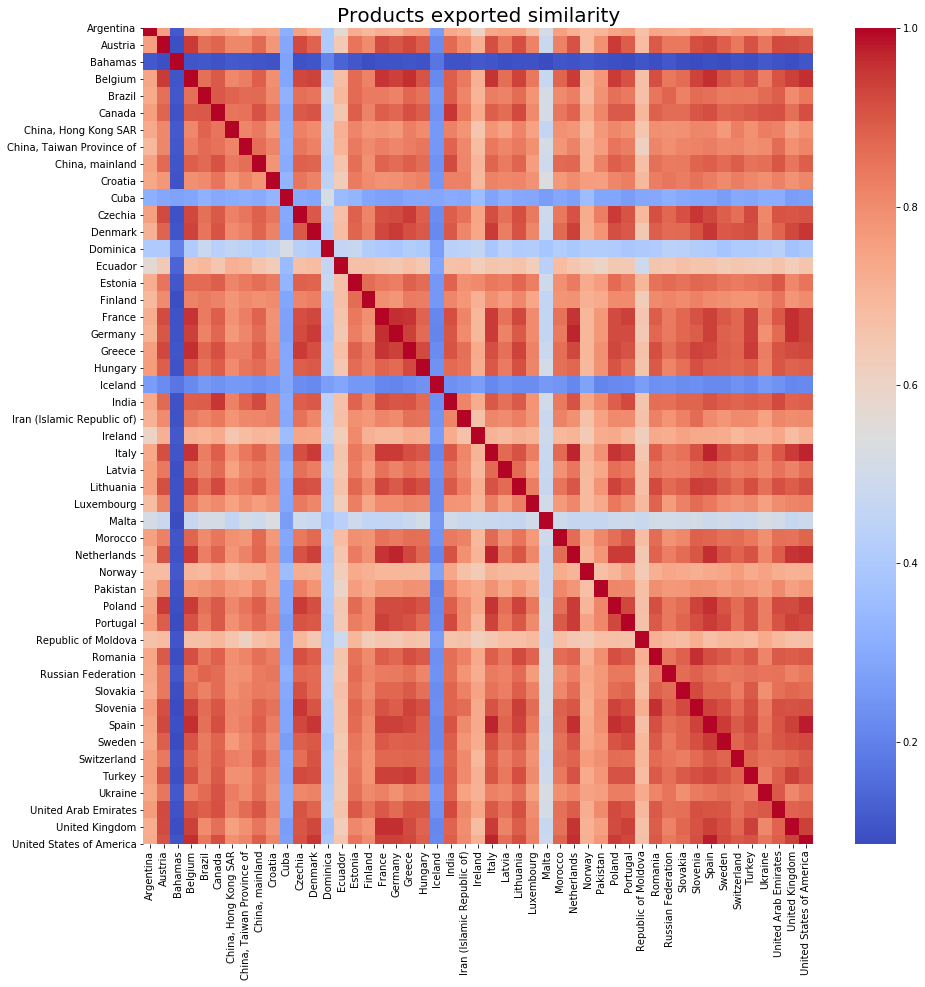

In [30]:
labels = df_exp_simil_prod['Reporter Countries']
plt.figure(figsize = (15,15))
sns.heatmap(matrix_similarity_product_exp[:50, :50], xticklabels = labels[:50], yticklabels = labels[:50],  cmap='coolwarm')
plt.title('Products exported similarity', fontsize = 20)

### A.6. Similarity considering the products they import 

In [31]:
# Delete this items with 0 value of production
df_imp_simil_prod = df_imp.loc[df_imp['Y2016'] != 0][['Reporter Countries','Item','Y2016']].copy()
df_imp_simil_prod = df_imp_simil_prod.groupby('Reporter Countries')['Item'].apply(list).reset_index(name='Products Imported')
df_imp_simil_prod.head(2)

,Reporter Countries,Products Imported
0,Argentina,"[Anise, badian, fennel, coriander, Anise, badi..."
1,Austria,"[Anise, badian, fennel, coriander, Anise, badi..."


In [32]:
# Compute Jaccard similarity
n = len(df_imp_simil_prod)
matrix_similarity_product_imp = np.empty((n,n))
for i in range(n):
    for j in range(n):
        list1 = df_imp_simil_prod['Products Imported'].iloc[i]
        list2 = df_imp_simil_prod['Products Imported'].iloc[j]
        matrix_similarity_product_imp[i][j] = jaccard_similarity(list1, list2)

Text(0.5, 1, 'Products imported similarity')

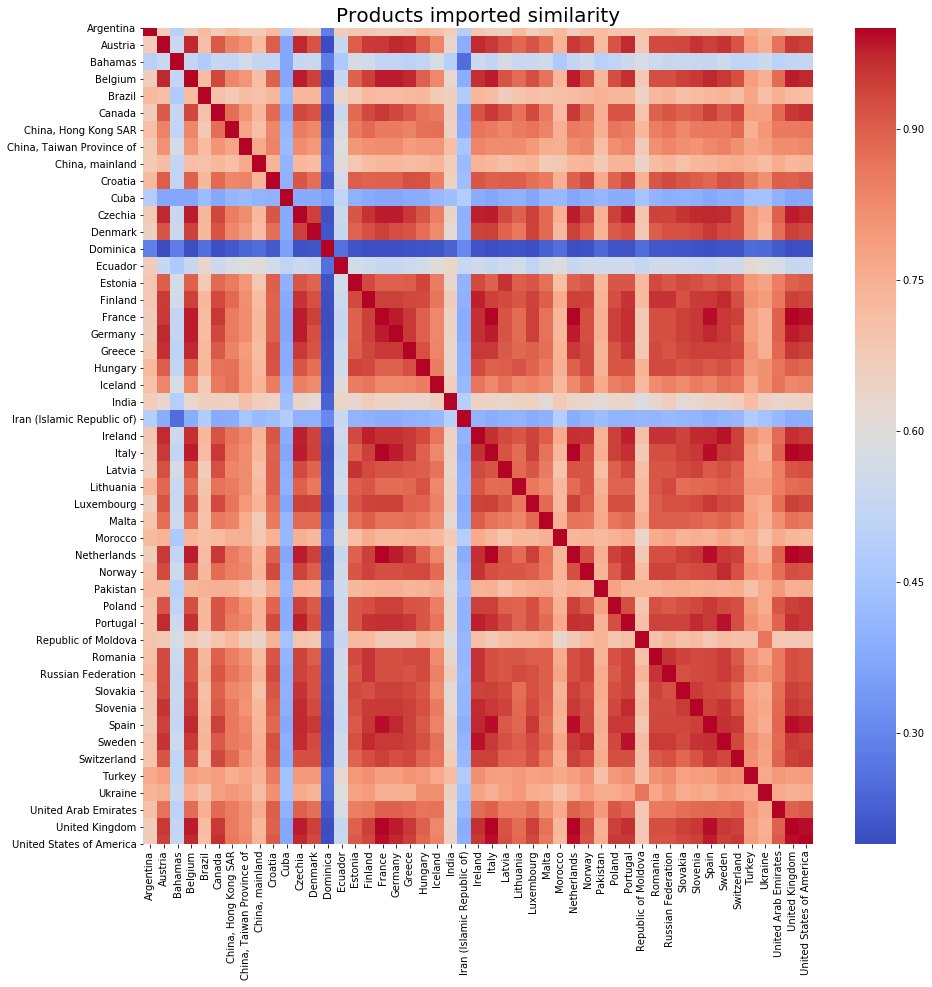

In [33]:
labels = df_imp_simil_prod['Reporter Countries']
plt.figure(figsize = (15,15))
sns.heatmap(matrix_similarity_product_imp[:50, :50], xticklabels = labels[:50], yticklabels = labels[:50],  cmap='coolwarm')
plt.title('Products imported similarity', fontsize = 20)

### A.7. Similarity products imported-exported

In [34]:
# Compute Jaccard similarity
n1 = len(df_exp_simil_prod)
n2 = len(df_imp_simil_prod)
matrix_similarity_product_impexp = np.empty((n1,n2))
for i in range(n1):
    for j in range(n2):
        list1 = df_exp_simil_prod['Products Exported'].iloc[i]
        list2 = df_imp_simil_prod['Products Imported'].iloc[j]
        matrix_similarity_product_impexp[i][j] = jaccard_similarity(list1, list2)

Text(114.0, 0.5, 'Countries that export')

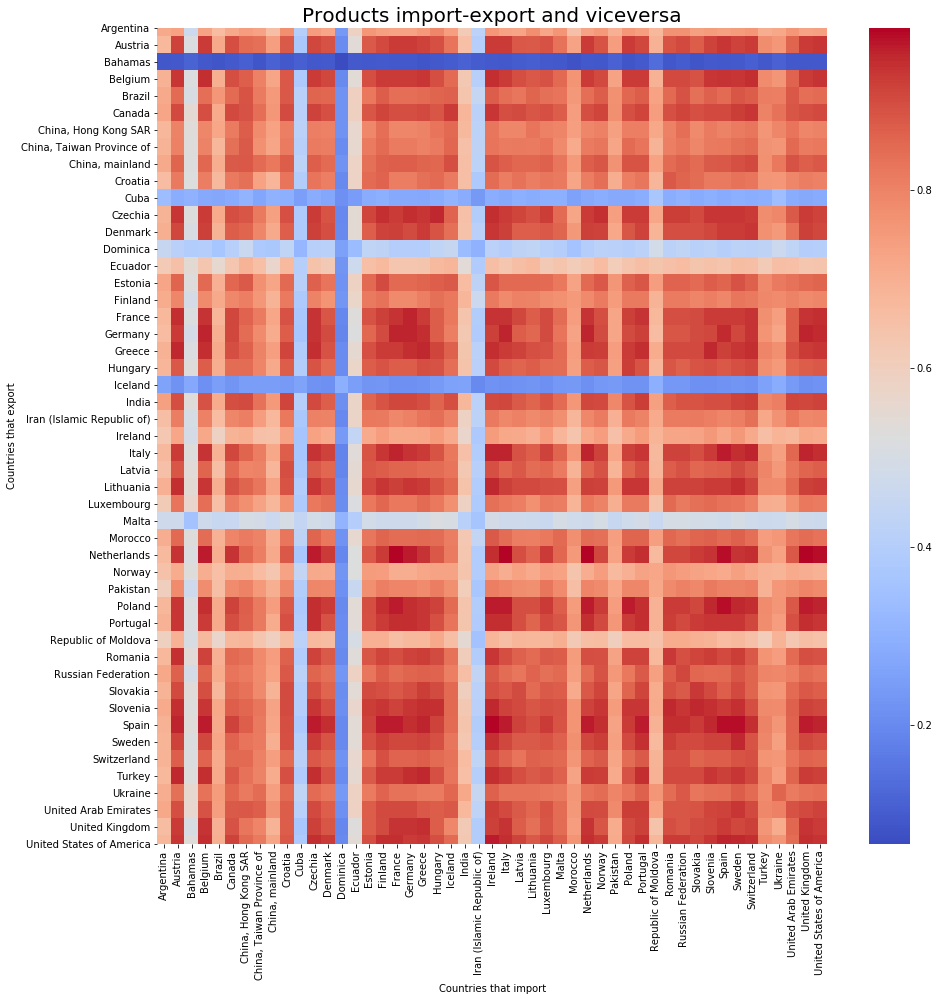

In [35]:
xlabels = df_exp_simil_prod['Reporter Countries']
ylabels = df_imp_simil_prod['Reporter Countries']
plt.figure(figsize = (15,15))
sns.heatmap(matrix_similarity_product_impexp[:50,:50], xticklabels = xlabels[:50], yticklabels = ylabels[:50], cmap='coolwarm')
plt.title('Products import-export and viceversa', fontsize = 20)
plt.xlabel('Countries that import')
plt.ylabel('Countries that export')

## B. Focusing on products

* B.1. Similarity considering the **countries** where they are **produced**
* B.2. Similarity considering the **countries** to where they are **exported**
* B.3. Similarity considering the **countries** from where they are **imported**
* B.4. Similarity considering the **import-export** **countries** in common

### B.1. Countries where they are produced

In [36]:
# Delete this items with 0 value of production
df_area_simil = df_prod.loc[df_prod['Y2016'] != 0][['Area','Item','Y2016']].copy()
df_area_simil = df_area_simil.groupby('Item')['Area'].apply(list).reset_index(name='Areas production')

In [37]:
# Compute Jaccard similarity
n = len(df_area_simil)
matrix_similarity_areas = np.empty((n,n))
for i in range(n):
    for j in range(n):
        list1 = df_area_simil['Areas production'].iloc[i]
        list2 = df_area_simil['Areas production'].iloc[j]
        matrix_similarity_areas[i][j] = jaccard_similarity(list1, list2)

Text(0.5, 1, 'Areas where they are produced similarity')

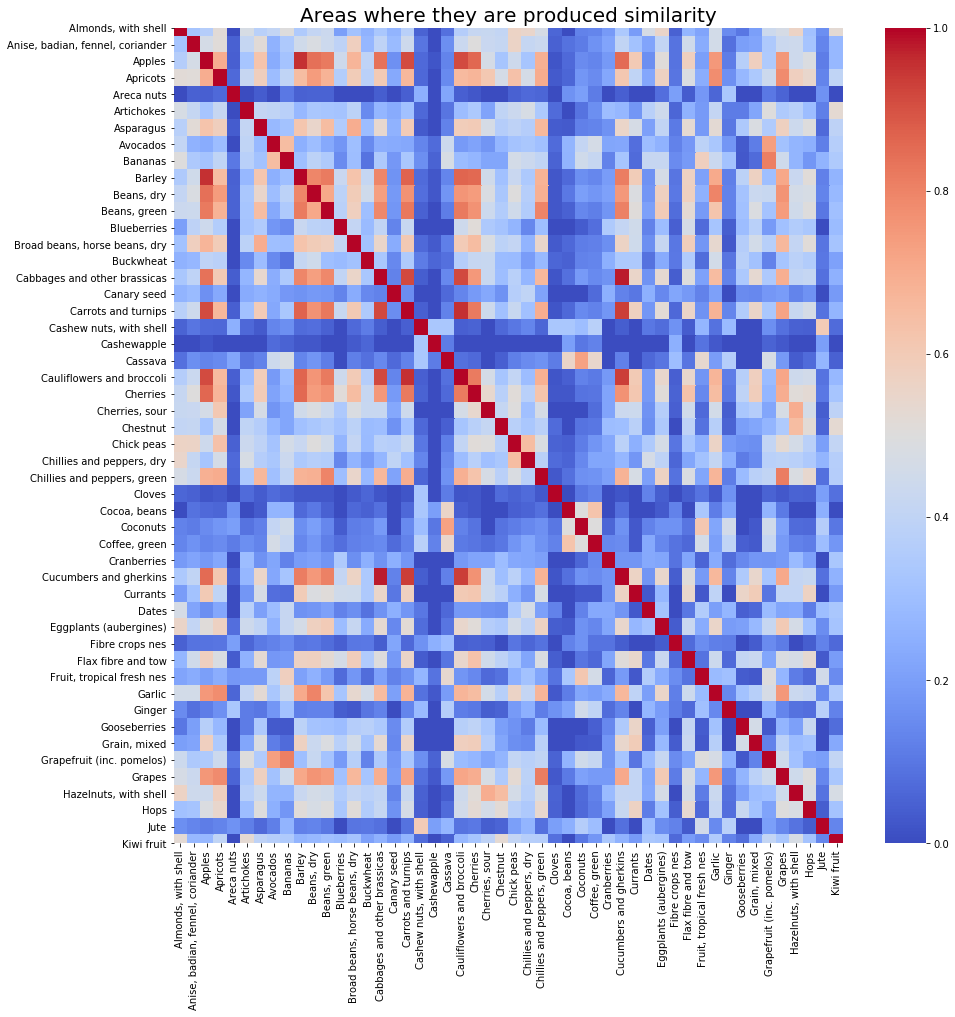

In [38]:
labels = df_area_simil['Item']
plt.figure(figsize = (15,15))
sns.heatmap(matrix_similarity_areas[:50, :50], xticklabels = labels[:50], yticklabels = labels[:50],  cmap='coolwarm')
plt.title('Areas where they are produced similarity', fontsize = 20)

### B.2. Countries to where they are exported

In [39]:
df_exp_simil = df_exp.loc[df_exp['Y2016'] != 0][['Reporter Countries','Item','Y2016']].copy()
df_exp_simil = df_exp_simil.groupby('Item')['Reporter Countries'].apply(list).reset_index(name='Exporter Countries')

In [40]:
# Compute Jaccard similarity
n = len(df_exp_simil)
matrix_similarity_country_exp = np.empty((n,n))
for i in range(n):
    for j in range(n):
        list1 = df_exp_simil['Exporter Countries'].iloc[i]
        list2 = df_exp_simil['Exporter Countries'].iloc[j]
        matrix_similarity_country_exp[i][j] = jaccard_similarity(list1, list2)

Text(0.5, 1, 'Exporter countries similarity')

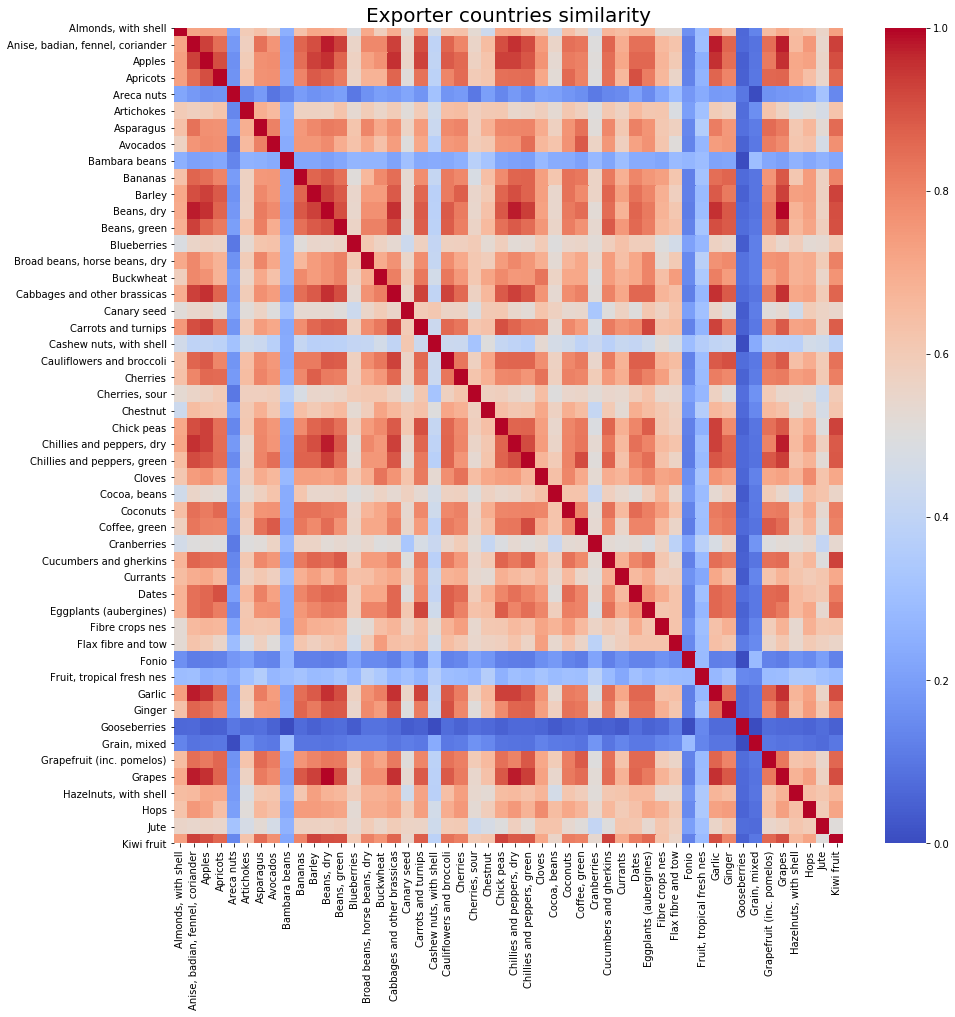

In [41]:
labels = df_exp_simil['Item']
plt.figure(figsize = (15,15))
sns.heatmap(matrix_similarity_country_exp[:50, :50], xticklabels = labels[:50], yticklabels = labels[:50],  cmap='coolwarm')
plt.title('Exporter countries similarity', fontsize = 20)

### B.3. Countries that import them

In [42]:
df_imp_simil = df_imp.loc[df_imp['Y2016'] != 0][['Reporter Countries','Item','Y2016']].copy()
df_imp_simil = df_imp_simil.groupby('Item')['Reporter Countries'].apply(list).reset_index(name='Importer Countries')

In [43]:
# Compute Jaccard similarity
n = len(df_imp_simil)
matrix_similarity_country_imp = np.empty((n,n))
for i in range(n):
    for j in range(n):
        list1 = df_imp_simil['Importer Countries'].iloc[i]
        list2 = df_imp_simil['Importer Countries'].iloc[j]
        matrix_similarity_country_imp[i][j] = jaccard_similarity(list1, list2)

Text(0.5, 1, 'Importer countries similarity')

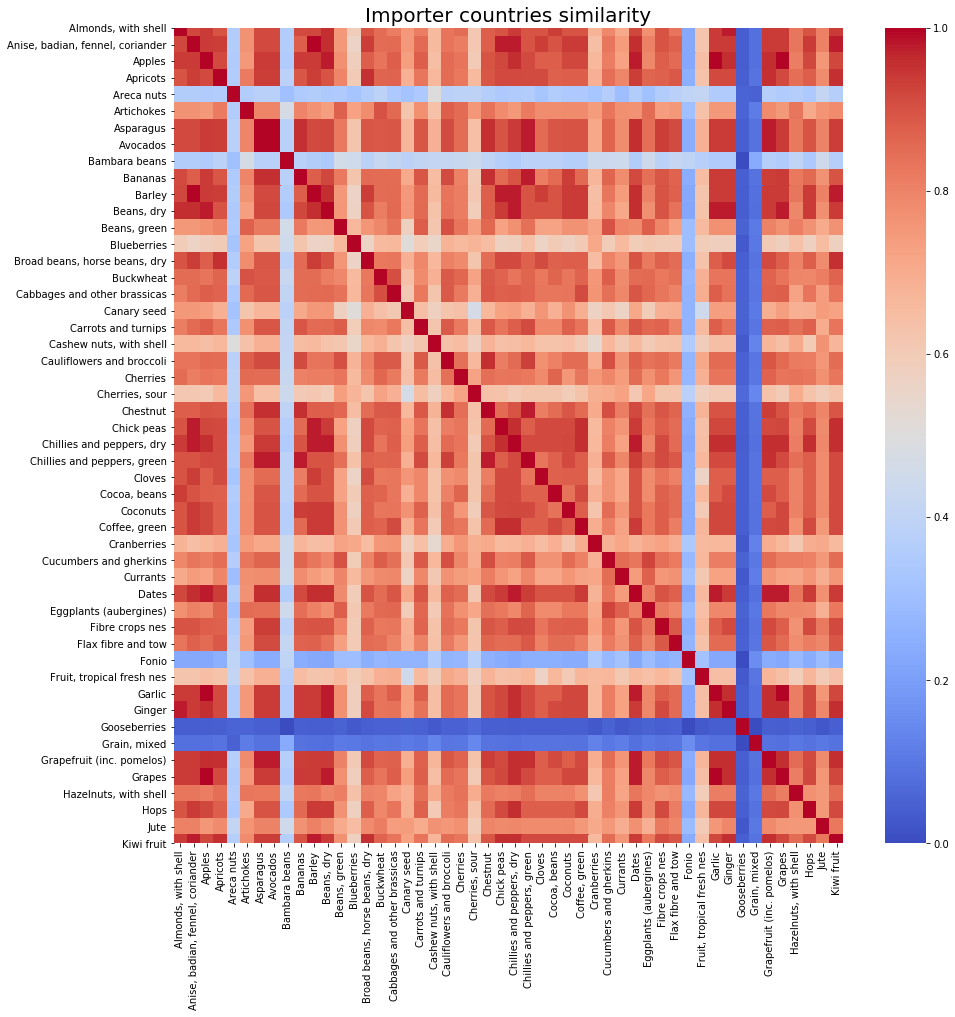

In [44]:
labels = df_imp_simil['Item']
plt.figure(figsize = (15,15))
sns.heatmap(matrix_similarity_country_imp[:50, :50], xticklabels = labels[:50], yticklabels = labels[:50],  cmap='coolwarm')
plt.title('Importer countries similarity', fontsize = 20)

In [101]:
df_prod_simil = df_prod.loc[df_prod['Element'] == 'Production'][['Area','Item','Y2016']].copy()

In [104]:
df_pivot = df_prod_simil.pivot('Area', 'Item', 'Y2016')
df_pivot = df_pivot.fillna(0)